In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 
import geopandas as gpd
import shapely as shp
from shapely.geometry import Point, LineString, Polygon, MultiPolygon

In [ ]:
generaliste = pd.ExcelFile("/Users/sarahboukhari/Documents/M1/S8/data visu/dataviz/data/Indicateur d'accessibilité potentielle localisée (APL) aux médecins généralistes.xlsx")
generaliste.sheet_names

['Paramètres', 'APL 2022', 'APL 2023']

In [36]:
generaliste_2023 = pd.read_excel(
    generaliste,
    sheet_name= 2,
    skiprows= 8
)
generaliste_2023

,Code commune INSEE,Commune,APL aux médecins généralistes,APL aux médecins généralistes de 65 ans et moins,APL aux médecins généralistes de 62 ans et moins,APL aux médecins généralistes de 60 ans et moins,Population standardisée 2021 pour la médecine générale,Population totale 2021
0,NaN,NaN,En nombre de consultations/visites accessibles...,En nombre de consultations/visites accessibles...,En nombre de consultations/visites accessibles...,En nombre de consultations/visites accessibles...,En nombre d'habitants standardisés,En nombre d'habitants
1,01001,L'Abergement-Clémenciat,1.942,1.881,1.623,1.455,838.154,832
2,01002,L'Abergement-de-Varey,2.376,1.767,1.503,1.333,255.723,267
3,01004,Ambérieu-en-Bugey,3.083,2.431,2.136,1.855,14575.887,14854
4,01005,Ambérieux-en-Dombes,3.706,3.648,3.015,2.998,1852.496,1897
...,...,...,...,...,...,...,...,...
34950,97420,Sainte-Suzanne,3.764,3.235,2.64,2.36,22314.19,24293
34951,97421,Salazie,3.354,2.465,1.576,1.576,6748.4,7243
34952,97422,Le Tampon,5.475,4.497,4.09,3.643,76427.591,81943
34953,97423,Les Trois-Bassins,5.044,5.044,5.044,5.044,6571.416,6899


In [48]:
generaliste_2023.columns

Index(['Code commune INSEE', 'Commune', 'APL aux médecins généralistes',
       'APL aux médecins généralistes de 65 ans et moins ',
       'APL aux médecins généralistes de 62 ans et moins ',
       'APL aux médecins généralistes de 60 ans et moins ',
       'Population standardisée 2021 pour la médecine générale',
       'Population totale 2021'],
      dtype='object')

In [46]:
communes = gpd.read_file("/Users/sarahboukhari/Documents/M1/S8/data visu/dataviz/data/COMMUNE.shp")

<Axes: >

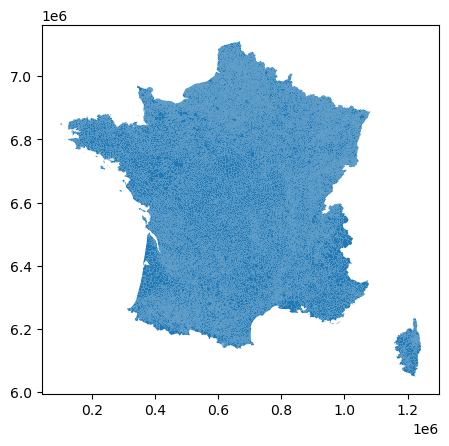

In [47]:
communes.plot()

In [49]:
generaliste_2023["Code commune INSEE"] = generaliste_2023["Code commune INSEE"].astype(str)
communes["INSEE_COM"] = communes["INSEE_COM"].astype(str)

In [50]:
gdf = communes.merge(
    generaliste_2023,
    left_on="INSEE_COM",
    right_on="Code commune INSEE",
    how="left"
)

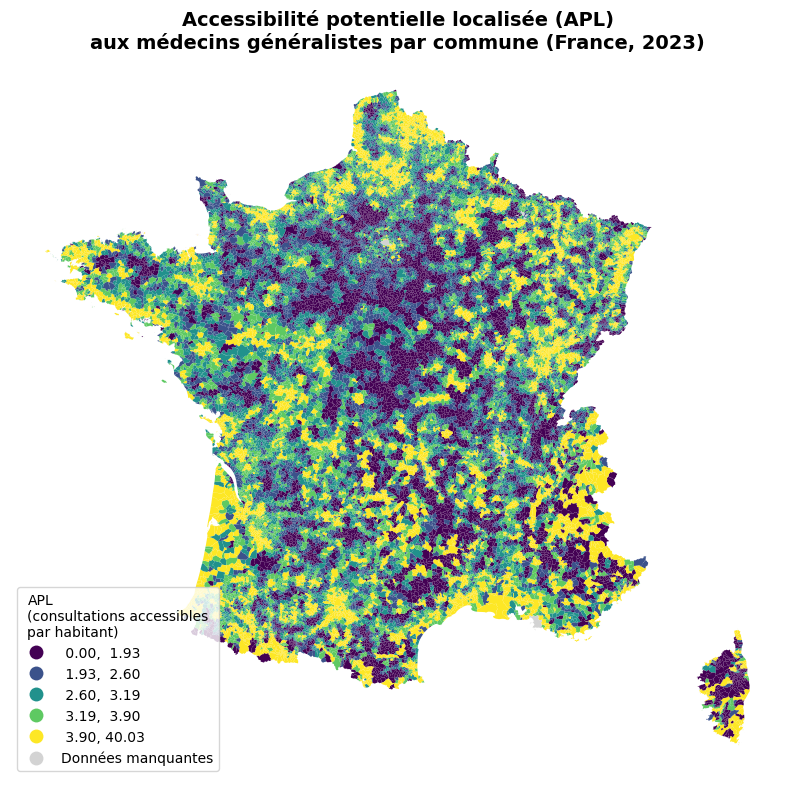

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))

gdf.plot(
    column="APL aux médecins généralistes",
    scheme="quantiles",
    k=5,                
    cmap="viridis",
    linewidth=0,
    legend=True,
    ax=ax,
    missing_kwds={
        "color": "lightgrey",
        "label": "Données manquantes"
    },
    legend_kwds={
        "title": "APL\n(consultations accessibles\npar habitant)",
        "loc": "lower left"
    }
)

ax.set_title(
    "Accessibilité potentielle localisée (APL)\n"
    "aux médecins généralistes par commune (France, 2023)",
    fontsize=14,
    fontweight="bold"
)

ax.axis("off")
plt.show()
